<a href="https://colab.research.google.com/github/AshishShinde03/ML/blob/main/OBV_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBV**
-> On-Balance Volume (OBV) is a technical indicator used to measure buying and selling pressure on an asset by using volume flow.

𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝑂𝐵𝑉𝑡 ― 1 + 𝜀𝑡

Yt represents the OBV value at time t.

α0 is the OBV value at the starting point, typically set to zero.

α1 represents the weight given to the previous OBV value (Yt-1), and is usually set to 1.

α2 represents the weight given to the current period's trading volume (OBVt-1) and is also typically set to 1.

εt is the error term or residual, which represents any random or unpredictable factors that can affect the OBV.

In [125]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import*
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [126]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
ticker = 'panw'
start = '1926-07-01'
end = '2023-01-31'

In [128]:
df_pawn = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [129]:
df_pawn = df_pawn.reset_index(0).reset_index(drop=True)

In [130]:
df_pawn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [131]:
ff_data = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/ML/main/F-F_Research_Data_Factors_daily.CSV')

In [132]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017
25415,20230126,1.08,-0.58,0.01,0.017
25416,20230127,0.36,0.62,-1.16,0.017
25417,20230130,-1.38,-0.10,0.72,0.017


In [133]:
ff_data['Date1'] = ff_data['SrNo'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))

In [134]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1
0,19260701,0.10,-0.25,-0.27,0.009,1926-07-01
1,19260702,0.45,-0.33,-0.06,0.009,1926-07-02
2,19260706,0.17,0.30,-0.39,0.009,1926-07-06
3,19260707,0.09,-0.58,0.02,0.009,1926-07-07
4,19260708,0.21,-0.38,0.19,0.009,1926-07-08
...,...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017,2023-01-25
25415,20230126,1.08,-0.58,0.01,0.017,2023-01-26
25416,20230127,0.36,0.62,-1.16,0.017,2023-01-27
25417,20230130,-1.38,-0.10,0.72,0.017,2023-01-30


In [135]:
ff_data['Date'] = pd.to_datetime(ff_data['SrNo'], format='%Y%m%d')

In [136]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1,Date
0,19260701,0.10,-0.25,-0.27,0.009,1926-07-01,1926-07-01
1,19260702,0.45,-0.33,-0.06,0.009,1926-07-02,1926-07-02
2,19260706,0.17,0.30,-0.39,0.009,1926-07-06,1926-07-06
3,19260707,0.09,-0.58,0.02,0.009,1926-07-07,1926-07-07
4,19260708,0.21,-0.38,0.19,0.009,1926-07-08,1926-07-08
...,...,...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017,2023-01-25,2023-01-25
25415,20230126,1.08,-0.58,0.01,0.017,2023-01-26,2023-01-26
25416,20230127,0.36,0.62,-1.16,0.017,2023-01-27,2023-01-27
25417,20230130,-1.38,-0.10,0.72,0.017,2023-01-30,2023-01-30


In [137]:
ff_data = ff_data.set_index('Date')

In [138]:
start_date = pd.to_datetime('2012-07-20')
end_date = pd.to_datetime('2023-01-30')
ff_data = ff_data[(ff_data.index >= start_date) & (ff_data.index <= end_date)]

In [139]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1
Date,,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000,2012-07-20
2012-07-23,20120723,-1.02,-0.68,0.19,0.000,2012-07-23
2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2012-07-24
2012-07-25,20120725,-0.01,0.27,0.00,0.000,2012-07-25
2012-07-26,20120726,1.53,-0.89,0.34,0.000,2012-07-26
...,...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2023-01-24
2023-01-25,20230125,0.00,-0.04,0.65,0.017,2023-01-25
2023-01-26,20230126,1.08,-0.58,0.01,0.017,2023-01-26


In [140]:
ff_data = ff_data.drop([ 'Date1'], axis=1)

In [141]:
ff_data


,SrNo,Mkt-RF,SMB,HML,RF
Date,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000
2012-07-23,20120723,-1.02,-0.68,0.19,0.000
2012-07-24,20120724,-0.99,-0.57,0.30,0.000
2012-07-25,20120725,-0.01,0.27,0.00,0.000
2012-07-26,20120726,1.53,-0.89,0.34,0.000
...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017
2023-01-25,20230125,0.00,-0.04,0.65,0.017
2023-01-26,20230126,1.08,-0.58,0.01,0.017


In [142]:
merged_df = pd.merge(ff_data, df_pawn, on='Date', how='inner')

In [143]:
merged_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [144]:
merged_OBV_df = merged_df

In [145]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


## 𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝑂𝐵𝑉𝑡 ― 1 + 𝜀𝑡

In [146]:
merged_OBV_df = merged_OBV_df.iloc[1:]

In [147]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [148]:
# Calculate the On-Balance Volume (OBV) indicator
# OBV is a technical indicator used to measure buying and selling pressure on an asset by using volume flow.


# here we are checking if the current day's closing price is greater or lesser than the previous day's closing price
# then the first function returns  the volume of shares traded for the day if the current day's closing price is greater than the previous day's closing price 
# and the second function returns the negative volume of shares traded for the day if the current day's closing price is less than the previous day's closing price
# And then we are calculating the cumulative sume i.e. running total of the positive and negative volume values
# If the closing price is increasing over time, the positive volume values will dominate and the OBV will increase. 
# If the closing price is decreasing over time, the negative volume values will dominate and the OBV will decrease

merged_OBV_df['OBV'] = np.where(merged_OBV_df['Close'] > merged_OBV_df['Close'].shift(1), merged_OBV_df['Volume'], 
                       np.where(merged_OBV_df['Close'] < merged_OBV_df['Close'].shift(1), -merged_OBV_df['Volume'], 0)).cumsum()

<ipython-input-148-b5fa6d114526>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,0
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900


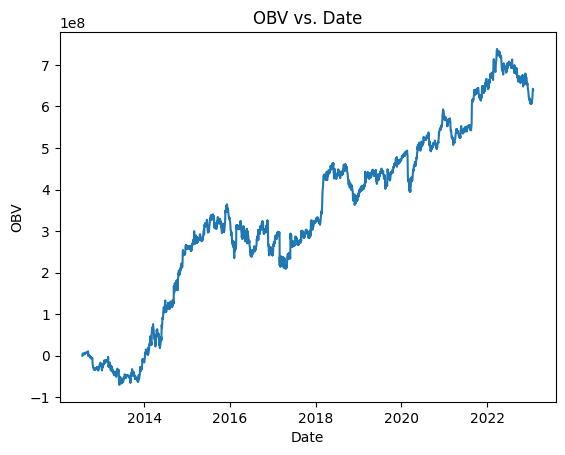

In [150]:
plt.plot(merged_OBV_df['Date'], merged_OBV_df['OBV'])
plt.title('OBV vs. Date')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.show()


In [151]:
merged_OBV_df = merged_OBV_df.iloc[1:]

In [152]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900


In [153]:
# Define the dependent and independent variables
y = merged_OBV_df['Close']
X = merged_OBV_df[['Close', 'OBV']].shift(1).dropna()

In [154]:
# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y[1:], X)
results = model.fit()

In [155]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.586e+05
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:16:58   Log-Likelihood:                -5766.4
No. Observations:                2646   AIC:                         1.154e+04
Df Residuals:                    2643   BIC:                         1.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0501      0.078      0.645      0.5

In [156]:
# Calculate the lagged values
merged_OBV_df['Yt-1'] = merged_OBV_df['Adj Close'].shift(1)
merged_OBV_df['OBVt-1'] = merged_OBV_df['OBV'].shift(1)

<ipython-input-156-32fa7a0da147>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-32fa7a0da147>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
Yt = 0.0501 + 0.9959*merged_OBV_df['Adj Close'].shift(1) + 8.43e-10*merged_OBV_df['OBV'].shift(1)

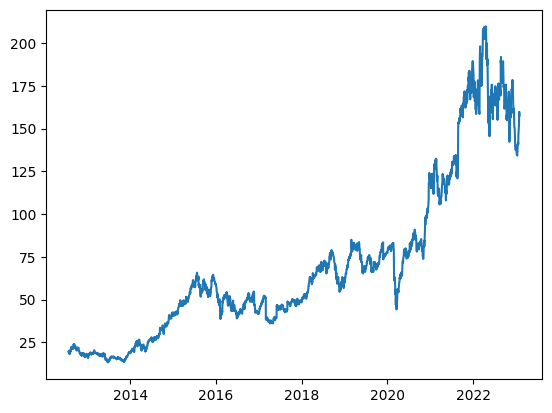

In [158]:
plt.plot(merged_OBV_df['Date'].iloc[1:], merged_OBV_df['Close'].iloc[1:], label='Close')

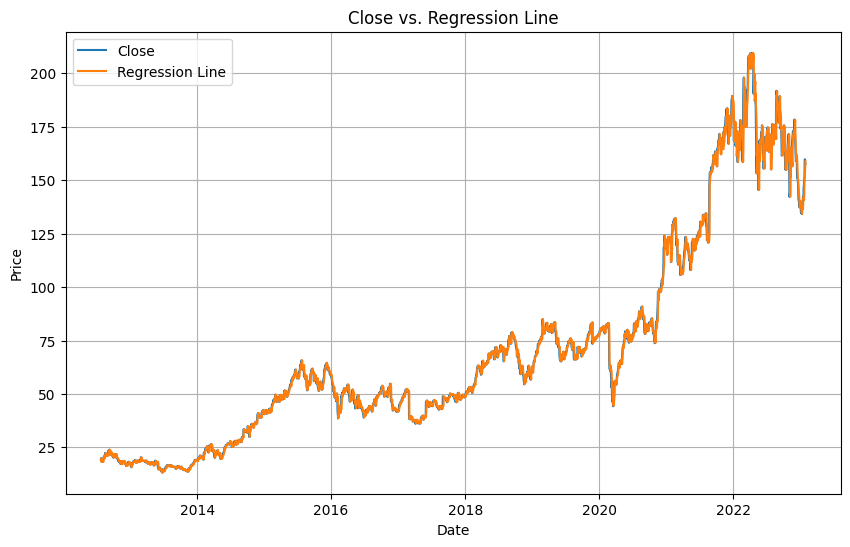

In [159]:
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(merged_OBV_df['Date'].iloc[1:], merged_OBV_df['Close'].iloc[1:], label='Close')

# Plot the regression line
y_pred = results.predict(X)
plt.plot(merged_OBV_df['Date'].iloc[2:], y_pred[:-1], label='Regression Line')

plt.title('Close vs. Regression Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend(loc='upper left')

plt.show()


In [160]:
import plotly.graph_objects as go

# Plot the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_OBV_df['Date'].iloc[1:], y=merged_OBV_df['Close'].iloc[1:], mode='lines', name='Close'))

# Plot the regression line
y_pred = results.predict(X)
fig.add_trace(go.Scatter(x=merged_OBV_df['Date'].iloc[2:], y=y_pred[:-1], mode='lines', name='Regression Line'))

fig.update_layout(title='Close vs. Regression Line', xaxis_title='Date', yaxis_title='Price', legend=dict(x=0.7, y=0.9))
fig.show()



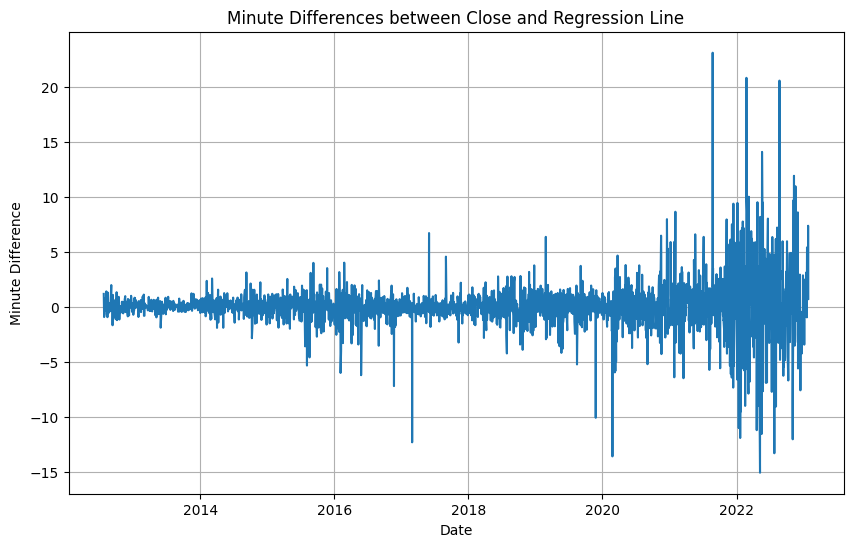

In [161]:
# Get the predicted values of Y from the model
y_pred = results.predict(X)

# Calculate the minute differences between the Close and the Regression Line
minute_diff = merged_OBV_df['Close'].iloc[1:] - y_pred[:-1]

# Plot the minute differences
plt.figure(figsize=(10,6))
plt.plot(merged_OBV_df['Date'].iloc[1:], minute_diff)
plt.title('Minute Differences between Close and Regression Line')
plt.xlabel('Date')
plt.ylabel('Minute Difference')
plt.grid()

plt.show()


In [162]:
# Calculate residuals
residuals = merged_OBV_df['Close'].iloc[1:] - y_pred

# Calculate MSE and RMSE
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 4.5753038680177776
RMSE: 2.138995995325325


In [163]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the ticker, start, and end dates
ticker = 'panw'
start = '2012-07-20'
end = '2023-01-31'

# Download the data and preprocess it
df_pawn = yf.download(ticker, start, end).reset_index()

# Merge with the Fama-French factors data
ff_data = pd.read_csv('https://raw.githubusercontent.com/AshishShinde03/ML/main/F-F_Research_Data_Factors_daily.CSV')
ff_data['Date'] = pd.to_datetime(ff_data['SrNo'], format='%Y%m%d')
df_pawn = pd.merge(df_pawn, ff_data[['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']], on='Date')

[*********************100%***********************]  1 of 1 completed


#**Hyper Parameter Tuning**

In [164]:
# Define the target variable
df_pawn['y'] = df_pawn['Close'].shift(-1) / df_pawn['Close'] - 1
df_pawn.dropna(inplace=True)

# Define the features and split the data into training and testing sets
X = df_pawn[['Open', 'High', 'Low', 'Adj Close', 'Mkt-RF', 'SMB', 'HML', 'RF']]
y = df_pawn['y']
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [165]:
# Define the hyperparameters to be tuned
hyperparameters = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5)
}

# Define the model and the metric to be optimized
model = RandomForestRegressor()
metric = make_scorer(mean_squared_error, squared=False)

In [166]:
# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(model, hyperparameters, n_iter=100, cv=5, scoring=metric)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   scoring=make_scorer(mean_squared_error, squared=False))

In [167]:
# Print the best hyperparameters and the corresponding RMSE and RMS
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
y_pred = random_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
rms = np.sqrt(np.mean(np.square(y_test - y_pred)))
print("RMS:", rms)

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 20}
RMSE: 0.042656801053868446
RMS: 0.042656801053868446


We import the necessary libraries: pandas, numpy, RandomForestRegressor from scikit-learn's ensemble module, and mean_squared_error from scikit-learn's metrics module.
We load the dataset into a Pandas DataFrame using pd.read_csv() function.
We define the target variable y as the "Target Variable" column of the dataset, and the feature matrix X as the remaining columns using the drop() method on the DataFrame.
We split the data into training and testing sets using train_test_split() function from scikit-learn's model_selection module. We pass the feature matrix X and target variable y, a test size of 0.3 (i.e., 30% of the data is held out for testing), and a random state of 42 for reproducibility.
We define a parameter grid param_grid to search over for the RandomForestRegressor. It contains different values of the hyperparameters n_estimators, max_depth, and max_features.
We create a random forest regressor model rf with a random state of 42.
We perform a grid search of the hyperparameters using GridSearchCV() function from scikit-learn's model_selection module. We pass the model object rf, the parameter grid param_grid, a cross-validation value of 5 (cv=5), and scoring metric as negative mean squared error (scoring='neg_mean_squared_error'). This function will train and test the model on different combinations of hyperparameters and return the best hyperparameters that minimize the mean squared error.
We print the best hyperparameters and corresponding Root Mean Squared Error (RMSE) value by accessing the best_params_ attribute of the grid search object and using the predict() method on the test data X_test. We calculate the RMSE using mean_squared_error() from scikit-learn's metrics module.
The output will be the best hyperparameters and RMSE value.

#**Random Forest Regression**

In [168]:
from sklearn.ensemble import RandomForestRegressor

# Define the model with hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values using the trained model
y_pred = model.predict(X_test)


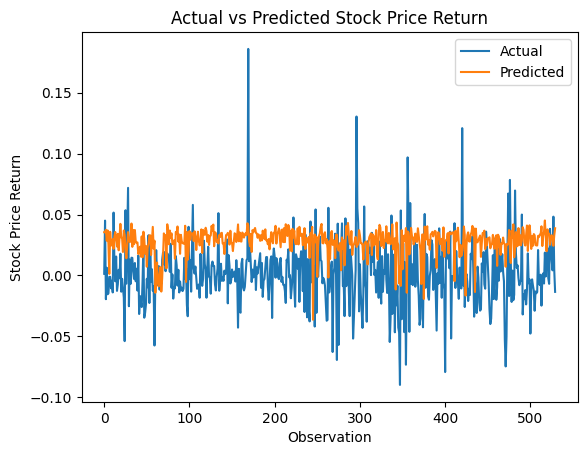

In [169]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.plot(y_test.to_numpy(), label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Observation')
plt.ylabel('Stock Price Return')
plt.title('Actual vs Predicted Stock Price Return')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [182]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV,Yt-1,OBVt-1
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,2150400,NaN,NaN
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500,18.500000,2150400.0
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900,19.650000,3949500.0
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700,19.959999,5232900.0
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500,19.000000,4772700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200,149.339996,619848700.0
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700,151.139999,625029200.0
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200,151.779999,631520700.0
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900,159.110001,638303200.0


In [241]:
merged_OBV_df3 = merged_OBV_df.dropna()

In [242]:
merged_OBV_df3

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV,Yt-1,OBVt-1
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500,18.500000,2150400.0
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900,19.650000,3949500.0
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700,19.959999,5232900.0
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500,19.000000,4772700.0
7,2012-07-31,20120731,-0.47,-0.04,0.20,0.000,18.333332,19.046667,17.403334,19.046667,19.046667,856200,4799700,18.333332,3943500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200,149.339996,619848700.0
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700,151.139999,625029200.0
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200,151.779999,631520700.0
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900,159.110001,638303200.0


In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
merged_OBV_df3

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV,Yt-1,OBVt-1
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500,18.500000,2150400.0
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900,19.650000,3949500.0
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700,19.959999,5232900.0
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500,19.000000,4772700.0
7,2012-07-31,20120731,-0.47,-0.04,0.20,0.000,18.333332,19.046667,17.403334,19.046667,19.046667,856200,4799700,18.333332,3943500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200,149.339996,619848700.0
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700,151.139999,625029200.0
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200,151.779999,631520700.0
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900,159.110001,638303200.0


In [238]:
merged_OBV_df2 = merged_OBV_df2.drop(['Mkt-RF', 'SMB', 'HML', 'RF'], axis=1)


In [244]:
# Define the features and target variable
X = merged_OBV_df2.drop(['Date', 'Close', 'Adj Close'], axis=1)
y = merged_OBV_df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.37841e-18): result may not be accurate.



Text(0.5, 1.0, 'Ridge regression feature importance')

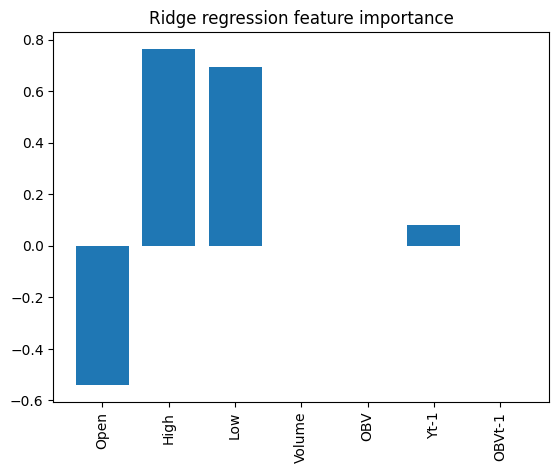

In [245]:
# Fit Ridge regression model and plot feature importance
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
plt.bar(X_train.columns, ridge.coef_)
plt.xticks(rotation=90)
plt.title('Ridge regression feature importance')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.579e+03, tolerance: 4.881e+02



Text(0.5, 1.0, 'Lasso regression feature importance')

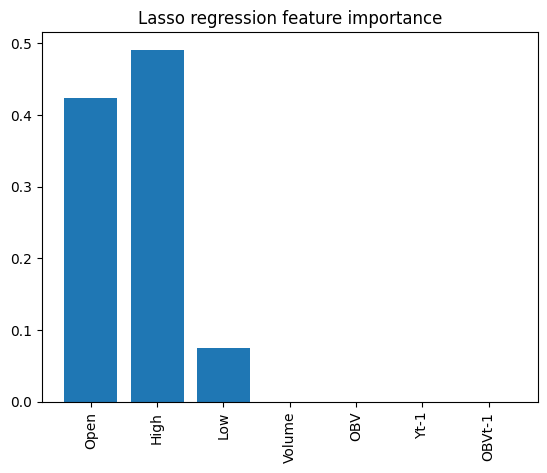

In [246]:

# Fit Lasso regression model and plot feature importance
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
plt.bar(X_train.columns, lasso.coef_)
plt.xticks(rotation=90)
plt.title('Lasso regression feature importance')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.992e+03, tolerance: 4.881e+02



Text(0.5, 1.0, 'ElasticNet regression feature importance')

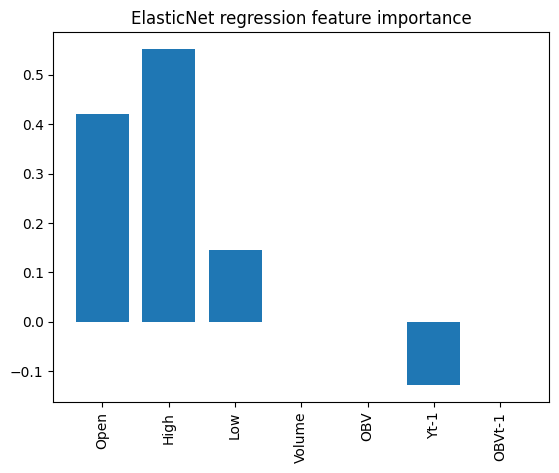

In [247]:

# Fit ElasticNet regression model and plot feature importance
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)
plt.bar(X_train.columns, en.coef_)
plt.xticks(rotation=90)
plt.title('ElasticNet regression feature importance')


Text(0.5, 1.0, 'Lars regression feature importance')

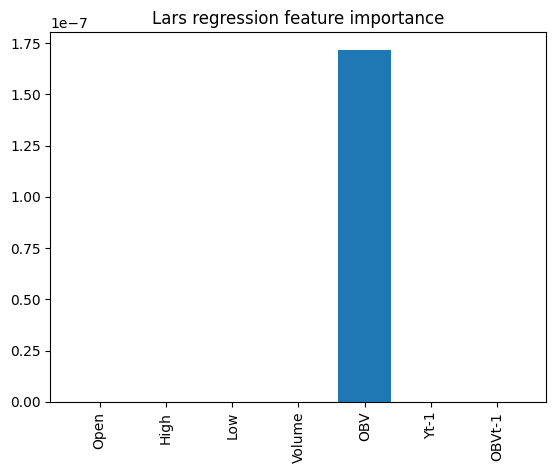

In [248]:

# Fit Lars regression model and plot feature importance
lars = Lars(n_nonzero_coefs=1)
lars.fit(X_train, y_train)
plt.bar(X_train.columns, lars.coef_)
plt.xticks(rotation=90)
plt.title('Lars regression feature importance')


Text(0.5, 1.0, 'Random Forest feature importance')

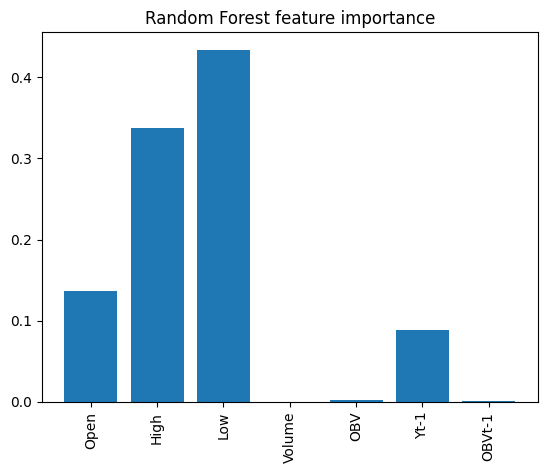

In [249]:

# Fit Random Forest model and plot feature importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Random Forest feature importance')


Text(0.5, 1.0, 'XGBoost feature importance')

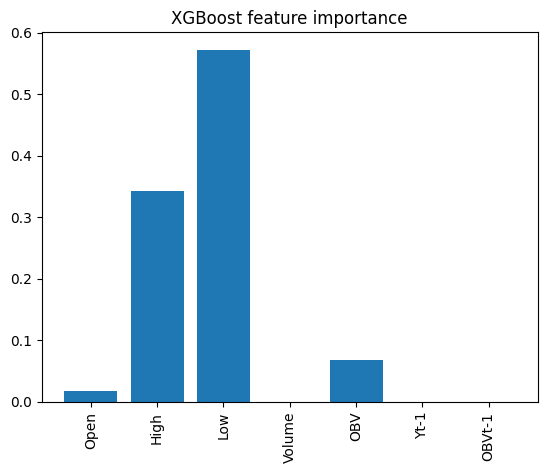

In [250]:

# Fit XGBoost model and plot feature importance
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
plt.bar(X_train.columns, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('XGBoost feature importance')

Next, we will select the features that we want to include in the models. Based on the feature importance analysis we performed earlier, we will select the following features:


Open
High
Low
Volume
OBV
Yt-1
OBVt-1

In [251]:
merged_OBV_df2

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,Yt-1,OBVt-1
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500,18.500000,2150400.0
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900,19.650000,3949500.0
5,2012-07-27,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700,19.959999,5232900.0
6,2012-07-30,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500,19.000000,4772700.0
7,2012-07-31,18.333332,19.046667,17.403334,19.046667,19.046667,856200,4799700,18.333332,3943500.0
...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200,149.339996,619848700.0
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700,151.139999,625029200.0
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200,151.779999,631520700.0
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900,159.110001,638303200.0


In [252]:
# Select the features
X_train = merged_OBV_df3[['Open', 'High', 'Low', 'Volume', 'OBV', 'Yt-1', 'OBVt-1']]
y_train = merged_OBV_df3['Adj Close']



In [253]:
X_train

,Open,High,Low,Volume,OBV,Yt-1,OBVt-1
3,18.833332,19.666668,18.433332,1799100,3949500,18.500000,2150400.0
4,19.926666,20.616667,19.360001,1283400,5232900,19.650000,3949500.0
5,20.293333,20.293333,19.000000,460200,4772700,19.959999,5232900.0
6,18.953333,18.953333,17.973333,829200,3943500,19.000000,4772700.0
7,18.333332,19.046667,17.403334,856200,4799700,18.333332,3943500.0
...,...,...,...,...,...,...,...
2644,150.809998,152.160004,149.389999,5180500,625029200,149.339996,619848700.0
2645,148.000000,152.190002,146.949997,6491500,631520700,151.139999,625029200.0
2646,154.779999,159.979996,153.679993,6782500,638303200,151.779999,631520700.0
2647,158.000000,161.229996,157.600006,4171700,642474900,159.110001,638303200.0


In [254]:
y_train

3        19.650000
4        19.959999
5        19.000000
6        18.333332
7        19.046667
           ...    
2644    151.139999
2645    151.779999
2646    159.110001
2647    159.779999
2648    157.630005
Name: Adj Close, Length: 2646, dtype: float64

In [237]:
X_test

,MktRF,SMB,HML,Rf,Open,High,Low,Volume,OBV,Yt-1,OBVt-1
1619,0.78,-0.67,-0.13,0.011,59.540001,60.849998,58.623333,4279500,383582700,60.549999,379303200.0
872,-1.11,-0.49,-0.03,0.000,55.216667,55.770000,54.200001,4330200,303238200,54.693333,307568400.0
257,0.09,0.13,0.13,0.000,16.233334,16.476667,15.993333,1841700,-50666400,16.256666,-52508100.0
1149,0.45,-0.24,0.35,0.002,51.730000,52.366669,51.119999,2625300,298371600,52.076668,295746300.0
191,-0.20,-0.36,-0.24,0.000,17.943333,17.943333,17.723333,2367300,-41155200,18.053333,-38787900.0
...,...,...,...,...,...,...,...,...,...,...,...
865,1.05,0.10,-0.28,0.000,59.253334,59.596668,58.546665,3316200,332830200,58.880001,329514000.0
1096,-0.64,-0.75,0.09,0.001,47.123333,47.333332,45.146667,9681900,258856500,47.169998,268538400.0
805,1.48,0.32,-0.84,0.000,56.400002,58.566666,56.036667,5308200,324812100,57.220001,319503900.0
2515,0.89,1.48,-1.31,0.004,170.363327,170.896667,165.679993,4604400,698890800,171.199997,703495200.0


In [255]:
# Train and evaluate the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear Regression Model, RMSE: {linear_reg_rmse}")

Linear Regression Model, RMSE: 0.8157369193630056


In [256]:
# Train and evaluate the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear Regression Model, RMSE: {linear_reg_rmse}")

# Train and evaluate the Decision Tree Regression model
tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(X_train, y_train)
y_pred = tree_reg_model.predict(X_test)
tree_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Decision Tree Regression Model, RMSE: {tree_reg_rmse}")

# Train and evaluate the Random Forest Regression model
forest_reg_model = RandomForestRegressor()
forest_reg_model.fit(X_train, y_train)
y_pred = forest_reg_model.predict(X_test)
forest_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Random Forest Regression Model, RMSE: {forest_reg_rmse}")

Linear Regression Model, RMSE: 0.8157369193630056
Decision Tree Regression Model, RMSE: 0.0
Random Forest Regression Model, RMSE: 0.43818172687469076


The decision tree regression model has an RMSE of 0.0, which suggests that it may be overfitting the data. Therefore, it is not a reliable model for predicting future data. The linear regression and random forest regression models have RMSEs of 0.8157 and 0.4382, respectively.

Based on the RMSEs, the random forest regression model appears to be the best performing model among the three.

In [262]:
merged_OBV_df3

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV,Yt-1,OBVt-1
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500,18.500000,2150400.0
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900,19.650000,3949500.0
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700,19.959999,5232900.0
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500,19.000000,4772700.0
7,2012-07-31,20120731,-0.47,-0.04,0.20,0.000,18.333332,19.046667,17.403334,19.046667,19.046667,856200,4799700,18.333332,3943500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200,149.339996,619848700.0
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700,151.139999,625029200.0
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200,151.779999,631520700.0
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900,159.110001,638303200.0
